In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import gdown
import seaborn as sb

import sklearn.cluster as cluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
gdown.download('https://docs.google.com/uc?export=download&id=16DnkCI2ORqbHR3GmEnA6BGNgyjqvHcYP','data.csv',quiet=True)
# https://github.com/importdata/Clustering-FIFA-20-Players

'data.csv'

In [29]:
data = pd.read_csv('data.csv')
data.rename(columns={'Unnamed: 0':'Sl_num'},inplace=True)
data.columns

Index(['Sl_num', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackl

In [30]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

data.fillna(0, inplace = True)
data.isnull().sum()

Sl_num            0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

In [31]:
data = data[data.Overall > 86] #comment if you want all the data
names = data.Name.tolist() # saving names for later
print('Names shape',len(names))
df=data.iloc[:,54:88]
print('Data shape',df.shape)
df.head()

Names shape 55
Data shape (55, 34)


,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [32]:
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [33]:
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [27]:

# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)
reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.030056,-1.084136,0,L. Messi
1,-0.941868,-0.781122,0,Cristiano Ronaldo
2,-0.876325,-0.983554,0,Neymar Jr
3,2.834820,-0.350178,1,De Gea
4,-0.992150,-0.077530,0,K. De Bruyne


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


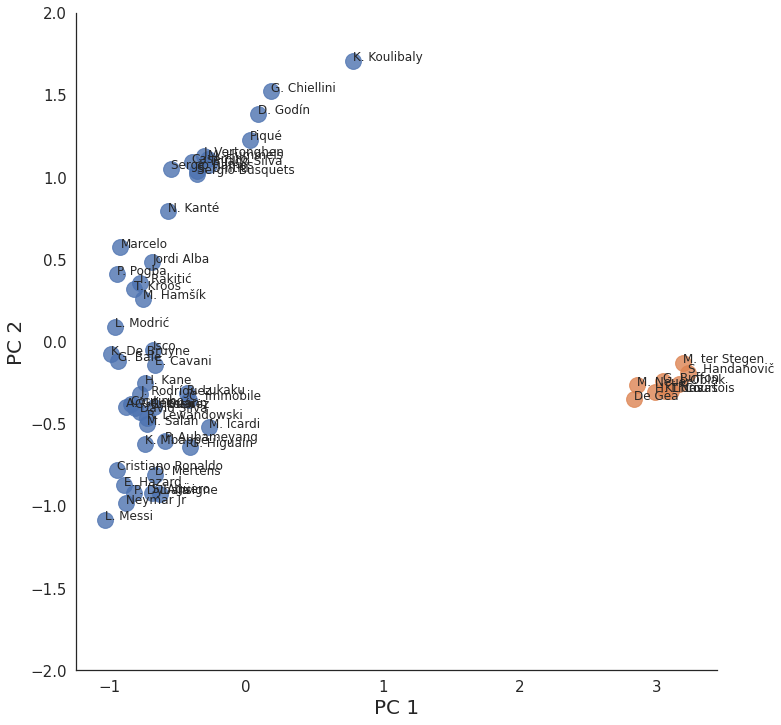

In [28]:
%matplotlib inline

sb.set(style="white")

ax = sb.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

## Optimal Epsilon

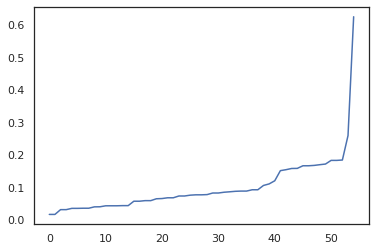

In [34]:
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(reduced)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
db= DBSCAN(eps=0.3, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)

reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.030056,-1.084136,0,L. Messi
1,-0.941868,-0.781122,0,Cristiano Ronaldo
2,-0.876325,-0.983554,0,Neymar Jr
3,2.834820,-0.350178,1,De Gea
4,-0.992150,-0.077530,0,K. De Bruyne


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


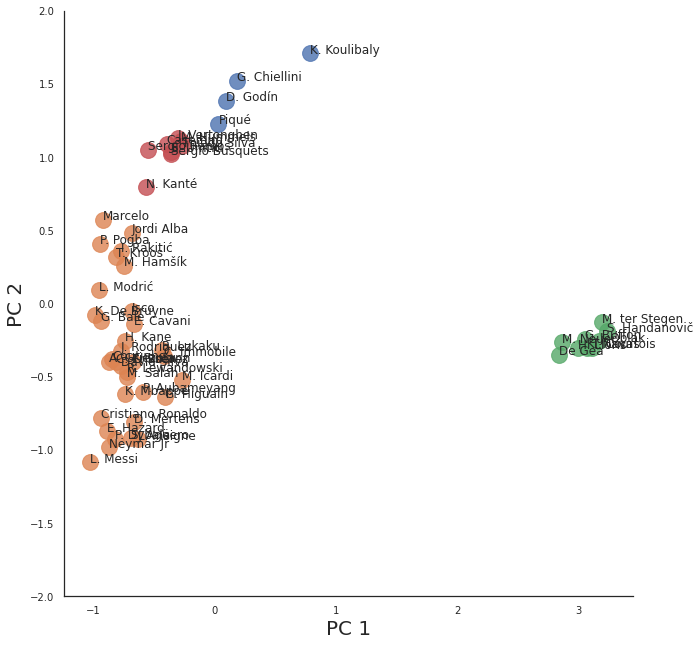

In [36]:
%matplotlib inline

sb.set(style="white")

ax = sb.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 9, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()